# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [ ]:
# imports
import pandas as pd
import numpy as np
import scipy
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson, skewnorm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
# Dataset Loading
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Superstore Marketing Data.csv"
df = pd.read_csv(path)

In [ ]:
# Dataset First Look
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
# Dataset Rows & Columns count
df.shape

(1315, 25)

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1315 entries, 0 to 2238
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   1315 non-null   int64         
 1   Year_Birth           1315 non-null   int64         
 2   Education            1315 non-null   object        
 3   Marital_Status       1315 non-null   object        
 4   Income               1315 non-null   float64       
 5   Kidhome              1315 non-null   int64         
 6   Teenhome             1315 non-null   int64         
 7   Dt_Customer          1315 non-null   datetime64[ns]
 8   Recency              1315 non-null   int64         
 9   MntWines             1315 non-null   int64         
 10  MntFruits            1315 non-null   int64         
 11  MntMeatProducts      1315 non-null   int64         
 12  MntFishProducts      1315 non-null   int64         
 13  MntSweetProducts     1315 non-null   i

In [ ]:
# Dataset Columns

list(df.columns)

['Id',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Response',
 'Complain',
 'Total_Spending',
 'Age',
 'Segment']

**Column description**

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
2. ID - Unique ID of each customer
3. Year_Birth - Age of the customer
4. Complain - 1 if the customer complained in the last 2 years
5. Dt_Customer - date of customer's enrollment with the company
6. Education - customer's level of education
7. Marital - customer's marital status
8. Kidhome - number of small children in customer's household
9. Teenhome - number of teenagers in customer's household
10. Income - customer's yearly household income
11. MntFishProducts - the amount spent on fish products in the last 2 years
12. MntMeatProducts - the amount spent on meat products in the last 2 years
13. MntFruits - the amount spent on fruits products in the last 2 years
14. MntSweetProducts - amount spent on sweet products in the last 2 years
15. MntWines - the amount spent on wine products in the last 2 years
16. MntGoldProds - the amount spent on gold products in the last 2 years
17. NumDealsPurchases - number of purchases made with discount
18. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
19. NumStorePurchases - number of purchases made directly in stores
20. NumWebPurchases - number of purchases made through the company's website
21. NumWebVisitsMonth - number of visits to company's website in the last month
22. Recency - number of days since the last purchase












In [ ]:
df.duplicated().sum()


0

In [ ]:
statistics_summary=df.describe()
statistics_summary


,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


In [ ]:
# Calculate the mean of the 'Income' column
income_mean = df['Income'].mean()

# Impute missing values with the mean
df['Income'].fillna(income_mean, inplace=True)

In [ ]:
# Identify rows with invalid dates
invalid_date_rows = df['Dt_Customer'].str.contains('########', na=False)

# Remove rows with invalid dates
df = df[~invalid_date_rows]


In [ ]:
# Convert "Dt_Customer" to datetime using .loc
df ['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

# type conversion
df['Education'].astype('category')
df['Marital_Status'].astype('category')

0       Divorced
1         Single
2        Married
5         Single
6        Married
          ...   
2230     Married
2233    Divorced
2234    Divorced
2236     Married
2238     Married
Name: Marital_Status, Length: 1324, dtype: category
Categories (8, object): ['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow',
                         'YOLO']

In [ ]:

df.dtypes

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
dtype: object

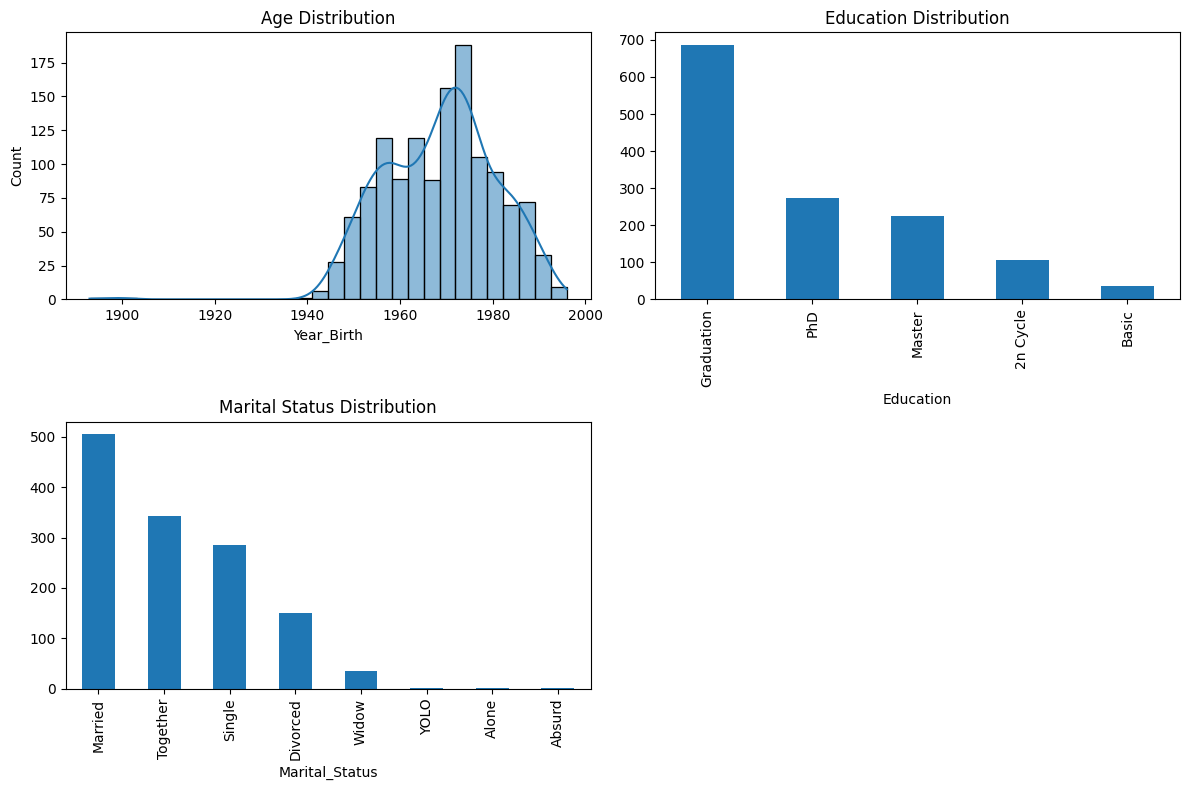

In [ ]:
# Distribution of Demographics
plt.figure(figsize=(12, 8))

# Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Year_Birth'], bins=30, kde=True)
plt.title('Age Distribution')

# Education Distribution
plt.subplot(2, 2, 2)
df['Education'].value_counts().plot(kind='bar')
plt.title('Education Distribution')

# Marital Status Distribution
plt.subplot(2, 2, 3)
df['Marital_Status'].value_counts().plot(kind='bar')
plt.title('Marital Status Distribution')

plt.tight_layout()
plt.show()



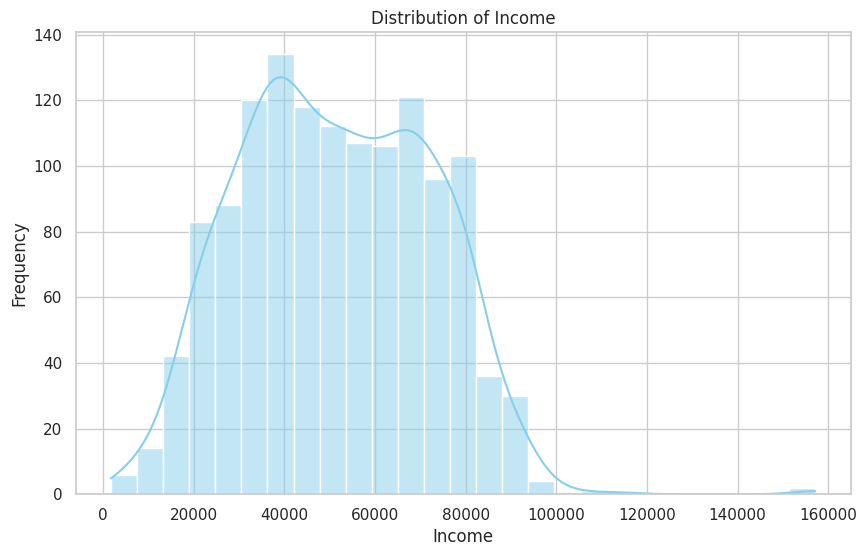

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Plot the distribution of 'Income'
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True, color='skyblue')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Calculate the z-scores
z_scores = np.abs((df['Income'] - df['Income'].mean()) / df['Income'].std())

# Define a threshold for z-scores
threshold = 3

# Identify outliers
outliers = df[z_scores > threshold]

# Remove outliers
df = df[z_scores <= threshold]

In [ ]:
# Calculate z-scores for 'Year_Birth'
z_scores_age = np.abs((df['Year_Birth'] - df['Year_Birth'].mean()) / df['Year_Birth'].std())

# Define a threshold for z-scores
threshold_age = 3

# Identify and remove outliers based on z-scores
df = df[z_scores_age <= threshold_age]

In [ ]:
# Remove rows with specified values
unexpected_values = ['YOLO', 'Absurd', 'Alone']
df = df[~df['Marital_Status'].isin(unexpected_values)]
print(df['Marital_Status'].unique())

['Divorced' 'Single' 'Married' 'Together' 'Widow']


In [ ]:
df.shape

(1315, 22)

In [ ]:
# Create a new feature 'Total_Spending' based on spending columns
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts',
                      'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [ ]:

df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Spending
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,189,218,1,4,4,6,1,1,0,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,37,1,7,3,7,5,1,0,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,30,1,3,2,5,2,0,0,251
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,32,43,1,4,7,5,2,1,0,1192
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,34,65,1,10,10,7,6,1,0,1215


In [ ]:
df.shape

(1315, 23)

In [ ]:
# Extract relevant columns
general_columns = ['Income', 'Recency', 'Total_Spending']

# Create dataframe
general_df = df[general_columns].copy()

# Calculate statistics
statistics_data_general = {
    'Variable': general_columns,
    'Mean': general_df.mean(),
    'Median': general_df.median(),
    'Variance': general_df.var(),
    'Std Deviation': general_df.std()
}

# Create a DataFrame
statistics_df_general = pd.DataFrame(statistics_data_general)

# Display the table
print("General DataFrame Statistics:")
statistics_df_general

General DataFrame Statistics:


,Variable,Mean,Median,Variance,Std Deviation
Income,Income,51252.639747,50664.0,4.191964e+08,20474.286760
Recency,Recency,49.414449,50.0,8.280815e+02,28.776406
Total_Spending,Total_Spending,596.736882,358.0,3.603459e+05,600.288208


In [ ]:
# Extract relevant columns
amount_spent_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                        'MntSweetProducts', 'MntGoldProds']

# Create dataframe
amount_spent_df = df[amount_spent_columns].copy()

# Calculate statistics
statistics_data_amount_spent = {
    'Variable': amount_spent_columns,
    'Mean': amount_spent_df.mean(),
    'Median': amount_spent_df.median(),
    'Variance': amount_spent_df.var(),
    'Std Deviation': amount_spent_df.std()
}

# Create a DataFrame
statistics_df_amount_spent = pd.DataFrame(statistics_data_amount_spent)

# Display the table
print("\nAmount Spent DataFrame Statistics:")
statistics_df_amount_spent


Amount Spent DataFrame Statistics:


,Variable,Mean,Median,Variance,Std Deviation
MntWines,MntWines,302.577947,171.0,114785.789011,338.800515
MntFruits,MntFruits,25.193916,7.0,1481.045321,38.484352
MntMeatProducts,MntMeatProducts,161.359696,66.0,46303.615574,215.182749
MntFishProducts,MntFishProducts,36.473004,11.0,2949.934392,54.313298
MntSweetProducts,MntSweetProducts,27.180989,8.0,1728.833276,41.579241
MntGoldProds,MntGoldProds,43.951331,24.0,2744.166579,52.384793


In [ ]:
# Extract relevant columns
purchase_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Create dataframe
purchase_df = df[purchase_columns].copy()

# Calculate statistics
statistics_data_purchase = {
    'Variable': purchase_columns,
    'Mean': purchase_df.mean(),
    'Median': purchase_df.median(),
    'Variance': purchase_df.var(),
    'Std Deviation': purchase_df.std()
}

# Create a DataFrame
statistics_df_purchase = pd.DataFrame(statistics_data_purchase)

# Display the table
print("\nPurchase Numbers DataFrame Statistics:")
statistics_df_purchase


Purchase Numbers DataFrame Statistics:


,Variable,Mean,Median,Variance,Std Deviation
NumWebPurchases,NumWebPurchases,4.100380,4.0,7.697679,2.774469
NumCatalogPurchases,NumCatalogPurchases,2.570342,1.0,7.526821,2.743505
NumStorePurchases,NumStorePurchases,5.802281,5.0,10.682339,3.268385


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [ ]:
# Key variables for analysis (including 'Total_Spending')
key_variables = ['Income', 'Recency', 'Total_Spending']

# Descriptive Statistics
descriptive_stats = df[key_variables].describe()

pd.DataFrame(descriptive_stats)

,Income,Recency,Total_Spending
count,1315.000000,1315.000000,1315.000000
mean,51252.639747,49.414449,596.736882
std,20474.286760,28.776406,600.288208
min,1730.000000,0.000000,5.000000
25%,35661.500000,25.000000,67.000000
50%,50664.000000,50.000000,358.000000
75%,68001.500000,74.000000,1034.000000
max,113734.000000,99.000000,2525.000000


In [ ]:

# Mode calculation
modes = df[key_variables].mode().transpose()
pd.DataFrame(modes)

,0,1
Income,52247.251354,NaN
Recency,65.000000,NaN
Total_Spending,22.000000,46.0


In [ ]:
# Standard Deviation
std_deviation = df[key_variables].std()
print("Standard Deviation:","\n",std_deviation)


Standard Deviation: 
 Income            20474.286760
Recency              28.776406
Total_Spending      600.288208
dtype: float64


## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

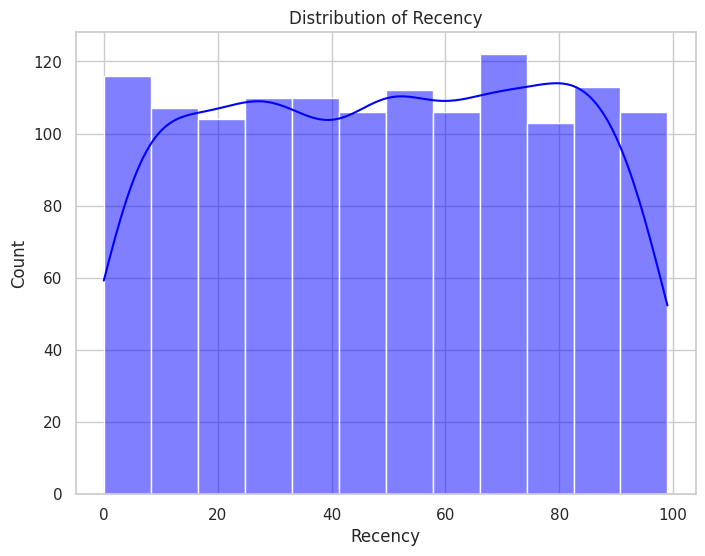

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram for 'Recency'
sns.histplot(df['Recency'], kde=True, color='blue', ax=ax)
ax.set_title('Distribution of Recency')
ax.set_xlabel('Recency')

# Show the plot
plt.show()

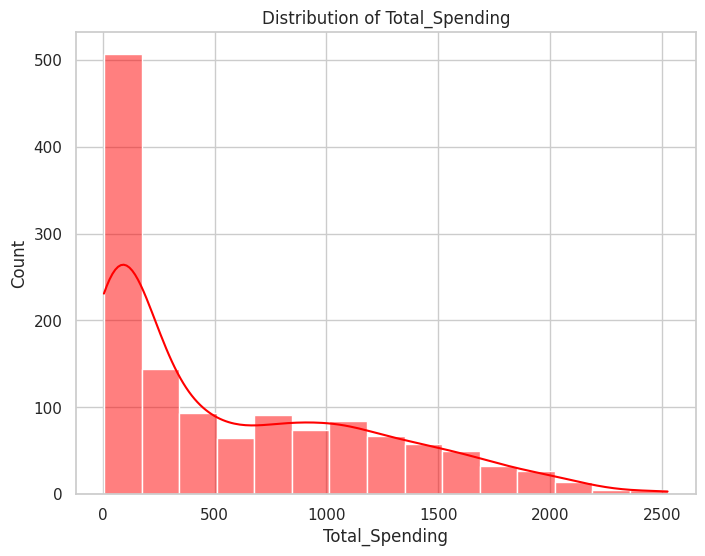

In [ ]:
# Set up the figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram for 'Total_Spending'
sns.histplot(df['Total_Spending'], kde=True, color='red', ax=ax)
ax.set_title('Distribution of Total_Spending')
ax.set_xlabel('Total_Spending')

# Show the plot
plt.show()


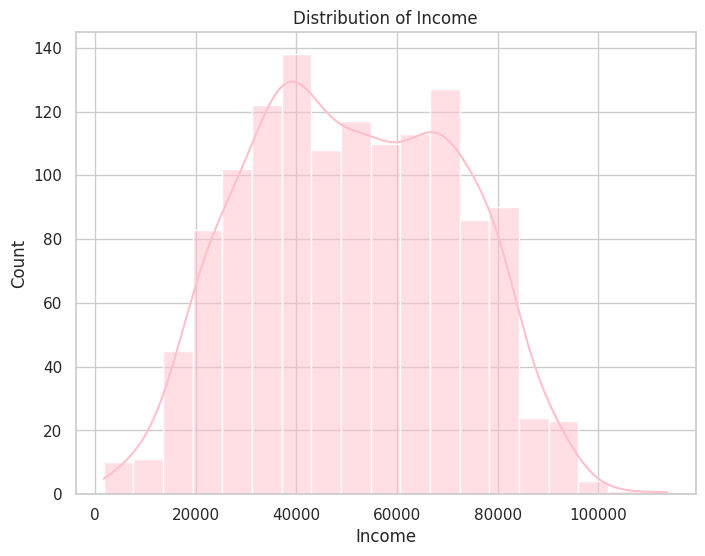

In [ ]:

# Set up the figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram for 'Income'
sns.histplot(df['Income'].dropna(), kde=True, color='pink', ax=ax)
ax.set_title('Distribution of Income')
ax.set_xlabel('Income')

# Show the plot
plt.show()

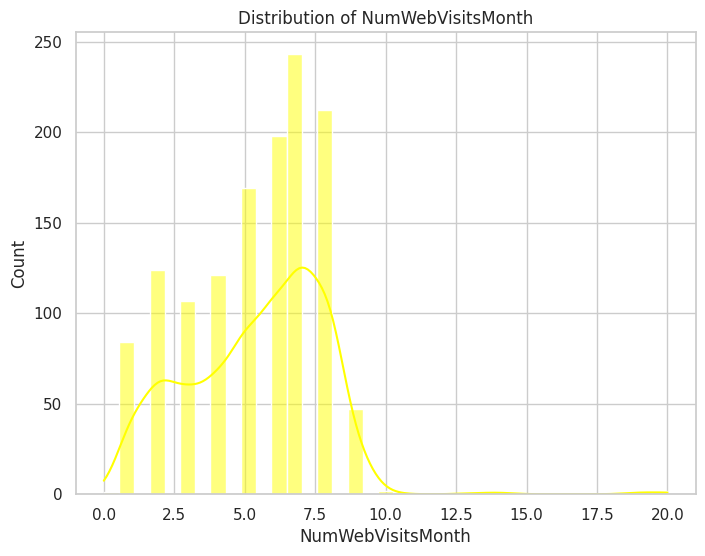

In [ ]:
# Set up the figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram for 'NumWebVisitsMonth'
sns.histplot(df['NumWebVisitsMonth'], kde=True, color='yellow', ax=ax)
ax.set_title('Distribution of NumWebVisitsMonth')
ax.set_xlabel('NumWebVisitsMonth')

# Show the plot
plt.show()


In [ ]:
# Taking 'Recency', 'NumWebVisitsMonth', 'Total_Spending', and 'Income' as examples
recency_data = df['Recency']
web_visits_data = df['NumWebVisitsMonth']
total_spending_data = df['Total_Spending']
income_data = df['Income']

# distributions based on characteristics
# Normal distribution
recency_distribution = norm

# Skew-normal distribution
web_visits_distribution = skewnorm

# Skew-normal distribution
total_spending_distribution = skewnorm

# Normal distribution
income_distribution = norm

In [ ]:
# Probabilities and expected values

# Recency
recency_mean = recency_data.mean()
recency_std = recency_data.std()
recency_probabilities = norm.pdf(recency_data, recency_mean, recency_std)
recency_expected_value = recency_data.mean()  # Using mean as an approximation for the expected value

# Web Visits
web_visits_skew = web_visits_data.skew()
web_visits_probabilities = skewnorm.pdf(web_visits_data, web_visits_skew)
web_visits_expected_value = web_visits_data.mean()  # Using mean as an approximation for the expected value

# Total Spending
total_spending_skew = total_spending_data.skew()
total_spending_probabilities = skewnorm.pdf(total_spending_data, total_spending_skew)
total_spending_expected_value = total_spending_data.mean()  # Using mean as an approximation for the expected value

# Income
income_mean = income_data.mean()
income_std = income_data.std()
income_probabilities = norm.pdf(income_data, income_mean, income_std)
income_expected_value = income_data.mean()  # Using mean as an approximation for the expected value

In [ ]:
print("Recency Distribution:")
print(f"Mean: {recency_mean}, Standard Deviation: {recency_std}")
print(f"Probabilities: {recency_probabilities}")
print(f"Expected Value: {recency_expected_value}")

Recency Distribution:
Mean: 49.41444866920152, Standard Deviation: 28.776405721300552
Probabilities: [0.0031737 0.0031737 0.0031737 ... 0.0031414 0.0031414 0.0031414]
Expected Value: 49.41444866920152


In [ ]:
print("\nWeb Visits Distribution:")
print(f"Skewness: {web_visits_skew}")
print(f"Probabilities: {web_visits_probabilities}")
print(f"Expected Value: {web_visits_expected_value}")


Web Visits Distribution:
Skewness: 0.29883075234071427
Probabilities: [2.98817104e-01 2.77253054e-06 7.82833480e-02 ... 2.36617078e-04
 1.00195692e-14 7.22395761e-03]
Expected Value: 5.421292775665399


In [ ]:

print("\nTotal Spending Distribution:")
print(f"Skewness: {total_spending_skew}")
print(f"Probabilities: {total_spending_probabilities}")
print(f"Expected Value: {total_spending_expected_value}")


Total Spending Distribution:
Skewness: 0.895750023330069
Probabilities: [0. 0. 0. ... 0. 0. 0.]
Expected Value: 596.7368821292775


In [ ]:
print("\nIncome Distribution:")
print(f"Mean: {income_mean}, Standard Deviation: {income_std}")
print(f"Probabilities: {income_probabilities}")
print(f"Expected Value: {income_expected_value}")


Income Distribution:
Mean: 51252.63974722379, Standard Deviation: 20474.286759676444
Probabilities: [5.07579963e-06 1.87087262e-05 1.43500364e-05 ... 7.82923310e-06
 1.19785287e-05 1.51283258e-05]
Expected Value: 51252.63974722379


## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

In [ ]:

# Calculate Age
from datetime import datetime
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']


In [ ]:
# Select relevant columns for segmentation
segmentation_data = df[['Age', 'Income', 'Recency', 'Total_Spending', 'NumWebPurchases']]

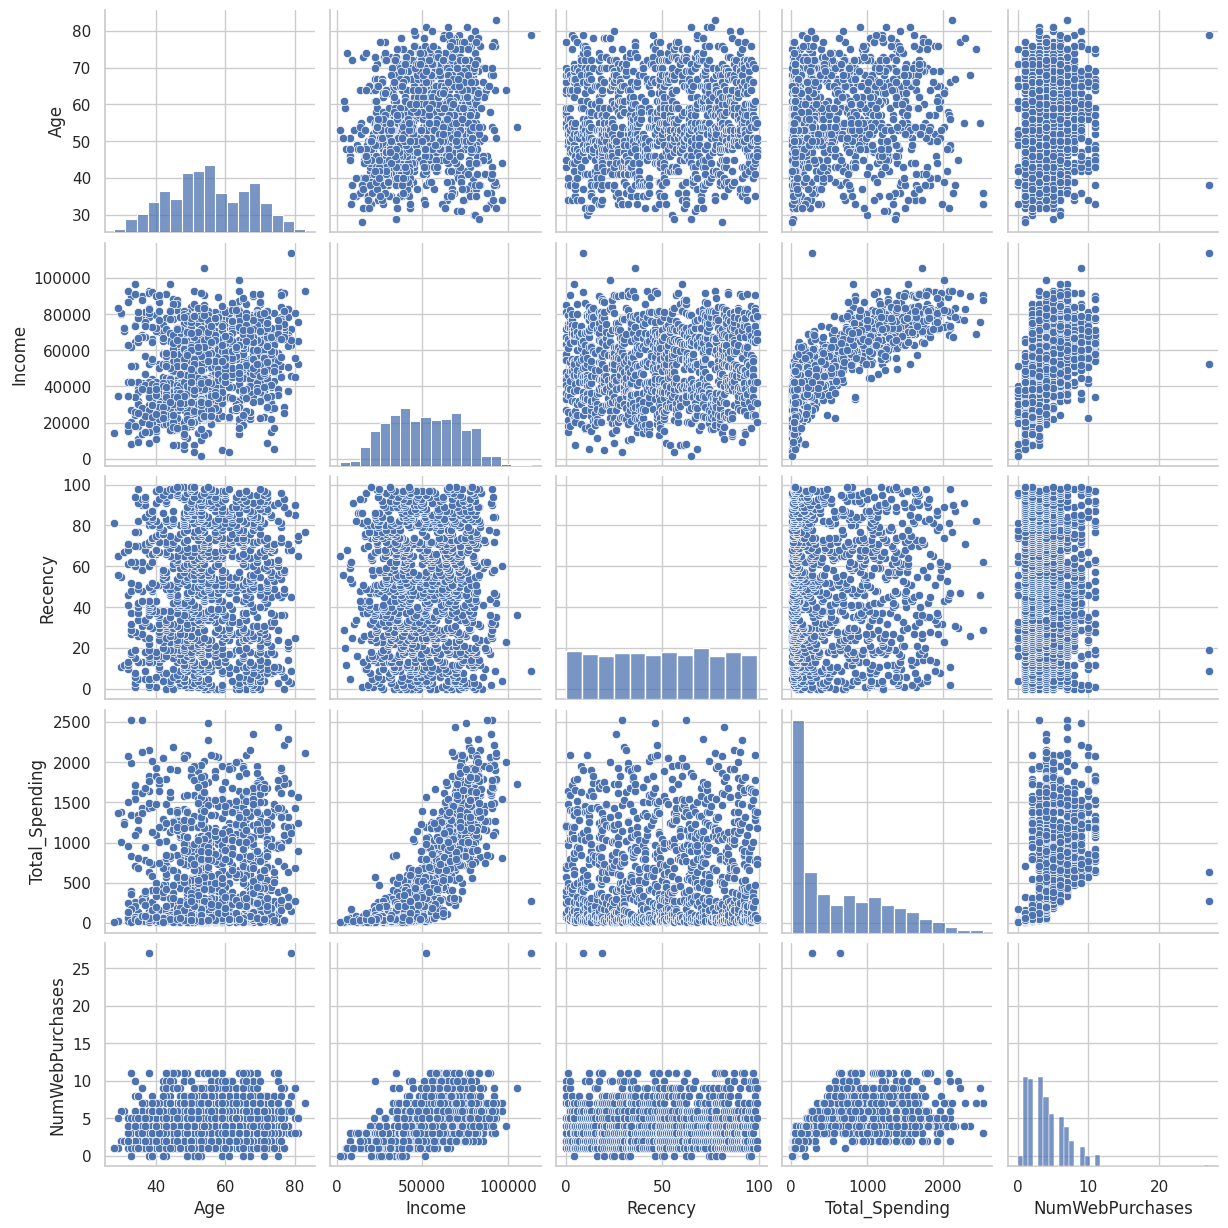

In [ ]:
# Inspect data distributions
sns.pairplot(segmentation_data)
plt.show()

In [ ]:

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(segmentation_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

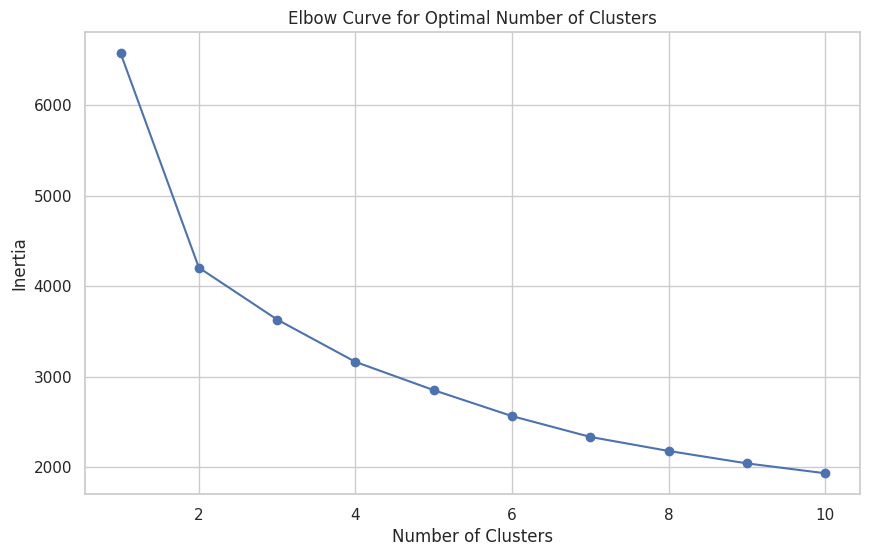

In [ ]:
# Determine the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans_model = KMeans(n_clusters=i, random_state=42)
    kmeans_model.fit(scaled_data)
    inertia.append(kmeans_model.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Curve for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


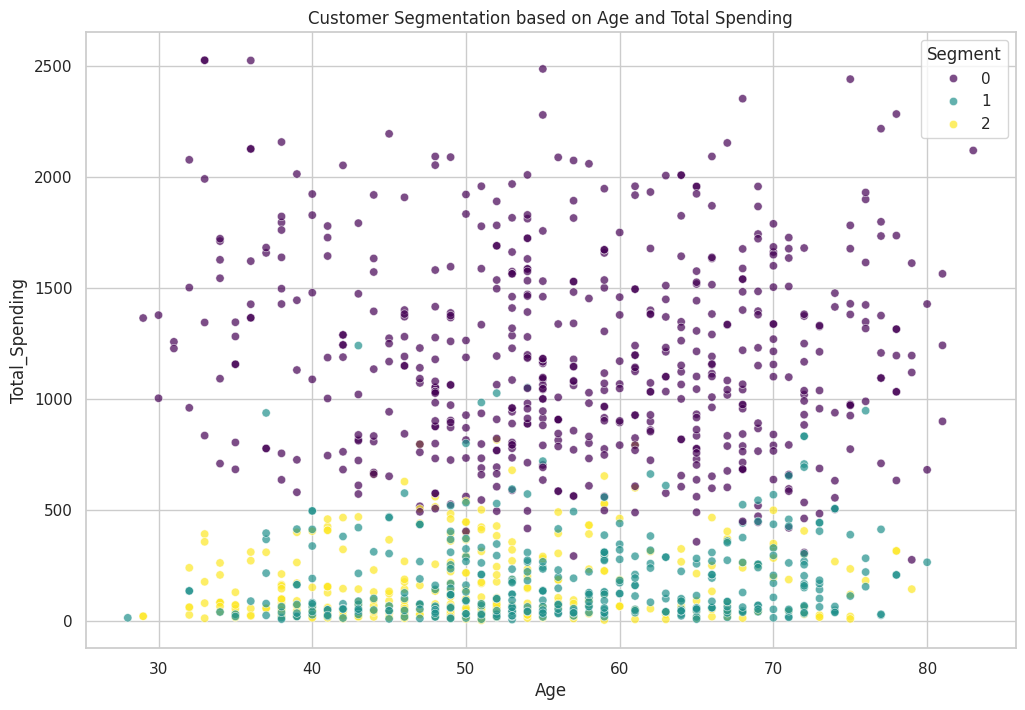

In [ ]:
# Based on the elbow curve, optimal number of clusters:
optimal_clusters = 3

# Perform KMeans clustering
kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Segment'] = kmeans_model.fit_predict(scaled_data)

# Visualize segmentation results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Total_Spending', hue='Segment', data=df, palette='viridis', alpha=0.7)
plt.title('Customer Segmentation based on Age and Total Spending')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

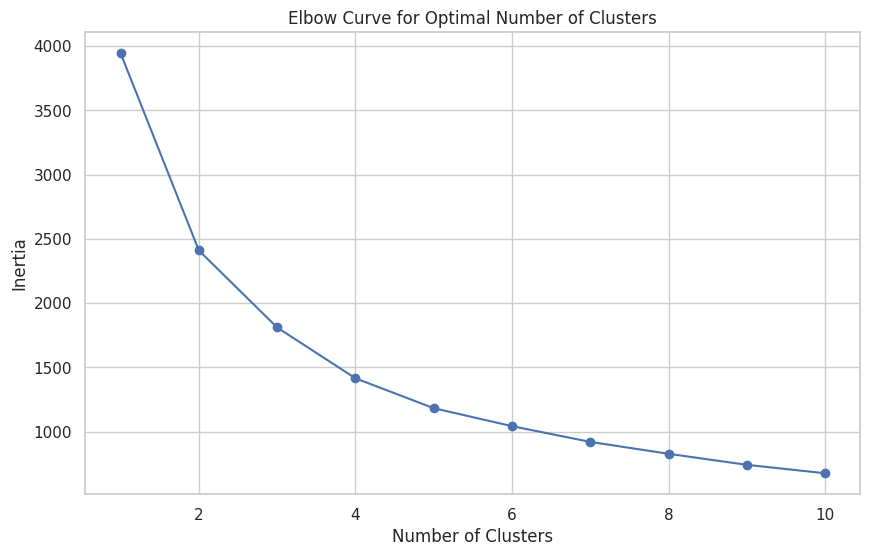

In [ ]:
# Select different combinations of features
feature_combinations = [
    ['Recency', 'Total_Spending', 'NumWebPurchases'],
    # Add more combinations as needed
]

for features in feature_combinations:
    # Select relevant columns for segmentation
    segmentation_data = df[features]

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(segmentation_data)

    # Determine the optimal number of clusters
    inertia = []
    for i in range(1, 11):
        kmeans_model = KMeans(n_clusters=i, random_state=42)
        kmeans_model.fit(scaled_data)
        inertia.append(kmeans_model.inertia_)

    # Plot the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Elbow Curve for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


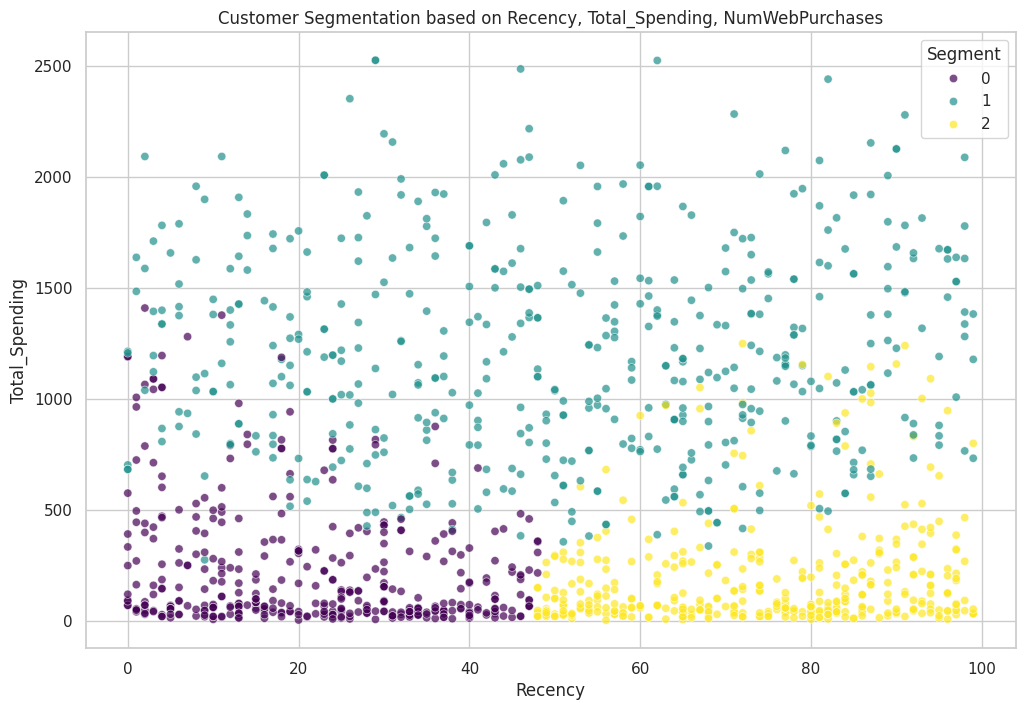

In [ ]:
# Based on the elbow curve, optimal number of clusters:
optimal_clusters = 3

# Perform KMeans clustering
kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Segment'] = kmeans_model.fit_predict(scaled_data)

# Visualize segmentation results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=features[0], y=features[1], hue='Segment', data=df, palette='viridis', alpha=0.7)
plt.title(f'Customer Segmentation based on {", ".join(features)}')
plt.show()

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

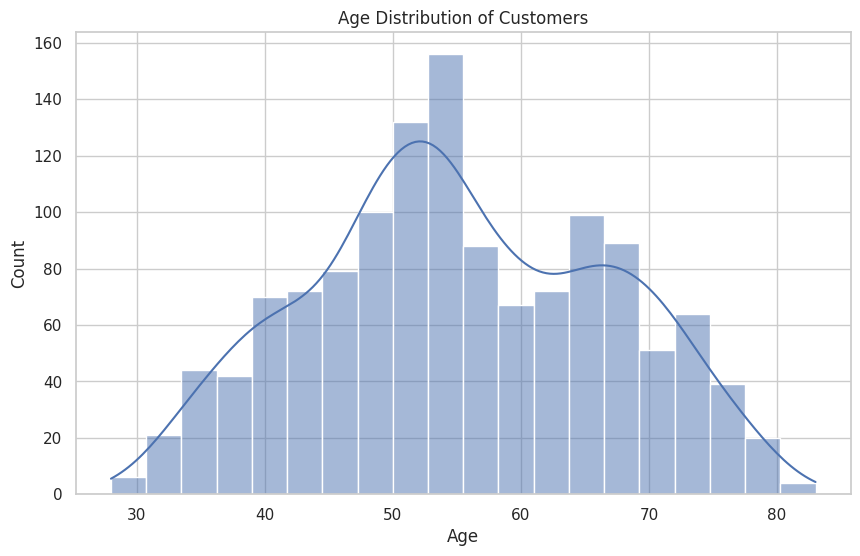

<ipython-input-58-ff3422dd8949>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=df, palette='viridis')


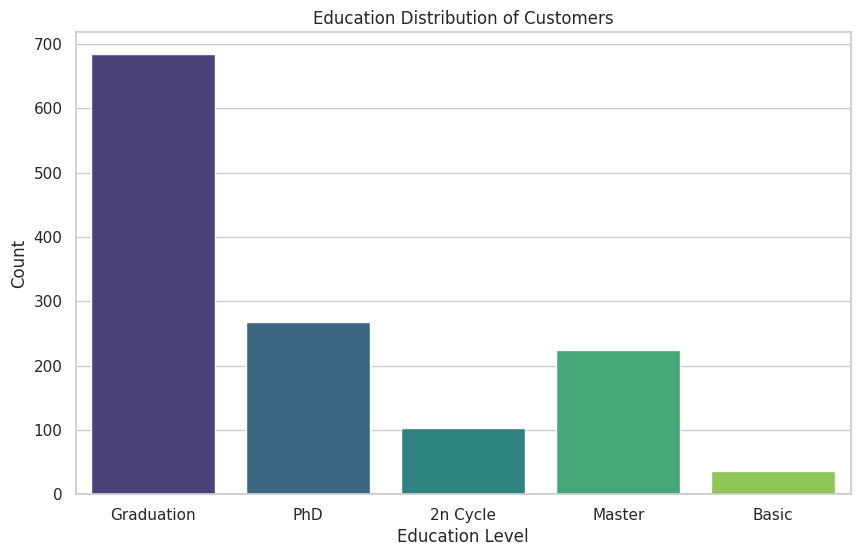

<ipython-input-58-ff3422dd8949>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital_Status', data=df, palette='viridis')


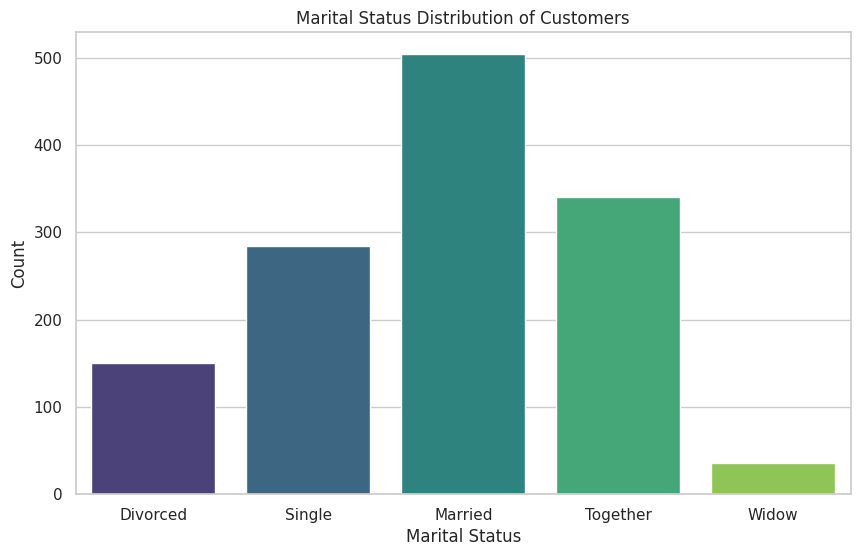

In [ ]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.show()

# Education Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=df, palette='viridis')
plt.title('Education Distribution of Customers')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', data=df, palette='viridis')
plt.title('Marital Status Distribution of Customers')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

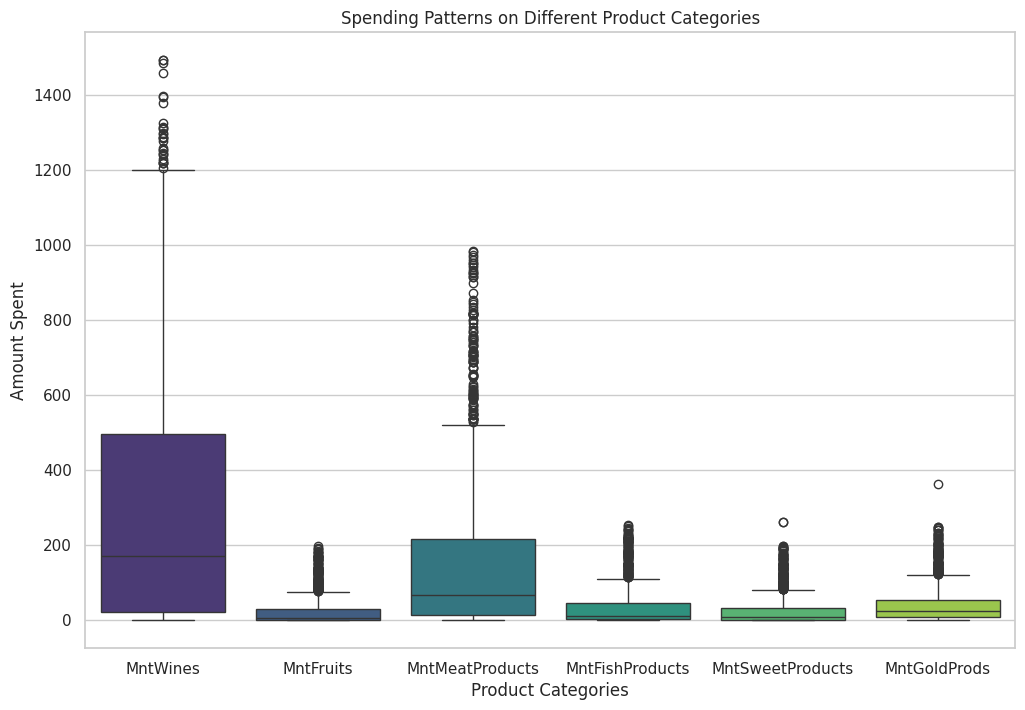

In [ ]:

# Spending Patterns on Different Product Categories
product_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[product_categories], palette='viridis')
plt.title('Spending Patterns on Different Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Amount Spent')
plt.show()

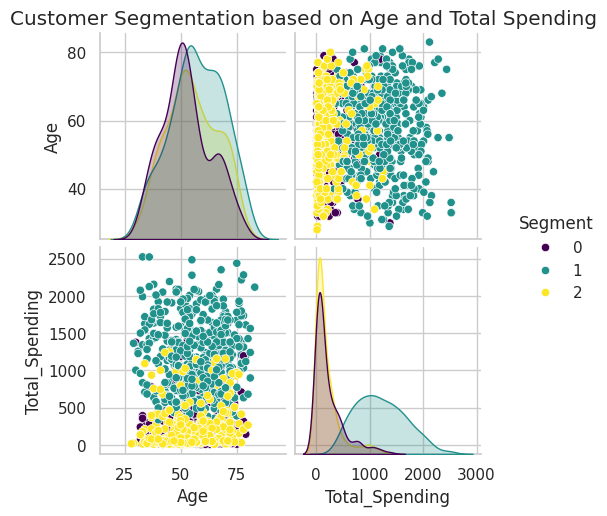

In [ ]:

# Visualize Customer Segmentation with Pair Plot
sns.set(style="whitegrid")  # Use "whitegrid" or "darkgrid"
sns.pairplot(df, hue="Segment", vars=['Age', 'Total_Spending'], palette='viridis')
plt.suptitle('Customer Segmentation based on Age and Total Spending', y=1.02)
plt.show()

Based on the analysis, here are some insights and actionable recommendations for the company:

Age Distribution:

Insight: The age distribution of customers exhibits a rough normal distribution.

Recommendation: Target marketing efforts based on age groups to tailor promotions and product recommendations more effectively. For example, promotions focused on younger age groups can be designed differently from those for older customers.

Education Distribution:

Insight: Graduates make up the largest portion, while basic education customers are the smallest group.

Recommendation: Design marketing strategies and campaigns that resonate with the majority of graduates. Consider creating targeted promotions or loyalty programs for customers with higher education levels.

Marital Status Distribution:

Insight: The majority of customers are married, while widow customers are the least represented.

Recommendation: Tailor advertising and promotions to appeal to married couples. Consider creating special promotions for couples or family-oriented products.

Spending Patterns on Different Product Categories:

Insight: Customers spend the most on wines and the least on fruits.

Recommendation: Focus on promoting wine-related products, as they have a higher demand. Consider introducing new fruit-related products or creating promotions to boost sales in this category.

Customer Segmentation based on Age and Total Spending:

Insight: The scatter plot shows segments based on age and total spending, but the clusters are not well-defined.

Recommendation: Further analyze and explore different combinations of features for segmentation. Conduct additional feature engineering to improve clustering results. Experiment with different clustering algorithms or consider a different approach for customer segmentation.